In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive


In [0]:
import numpy as np
import csv
import matplotlib.pyplot as plt

#Training the perceptron
**This will return us the weights**

Weights =  [141.66278463486887, -208.73885870485674, -0.8819999999999999]


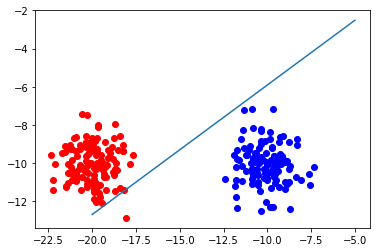

In [68]:
def perceptron(X,Y,y,no_of_points,no_of_iter):
    W=[0,0,-1]
    alpha = 0.001
    er=0
    error=[]
    for _ in range(no_of_iter):
        for i in range(no_of_points):
            temp = y[i]*(W[0] * X[i] + W[1]* Y[i] + W[2])
            #print(type(temp))
            if(temp<=0):
                W[0]=W[0]+y[i]*X[i]
                W[1]=W[1]+y[i]*Y[i]
                W[2]=W[2]+y[i]*alpha
                er=er+1
        error.append(er)
        er=0
    return W,error
def csv_reader():
    rows=[]
    X=[]
    Y=[]
    y=[]
    filename = "DL/Datasets-Question1/dataset3/Test3.csv"
    with open(filename, "r") as csv_file:
        csv_reader = csv.reader(csv_file)
        for lines in csv_reader:
            X.append (float(lines[0]))
            Y.append (float(lines[1]))
            label = int(float(lines[2]))
            if(label == 0):
                y.append(-1)
            else:
                y.append(1)
    no_of_points = csv_reader.line_num
	
    return X,Y,y,no_of_points;
def main(no_of_iter):
    X,Y,y,no_of_points = csv_reader()
    for i in range(no_of_points):
        if(y[i] == 1):
            plt.plot(X[i],Y[i],'bo')
            #print("yes")
        else:
            plt.plot(X[i],Y[i],'ro')
    W,err = perceptron(X,Y,y,no_of_points,no_of_iter)
    return W,err,no_of_points
weight = []
weight,Err,no_of_point = main(100)
print("Weights = ",weight)
xx = np.linspace(-20,-5)
yy = -weight[2]-((weight[0]/weight[1])*xx)
plt.plot(xx,yy)

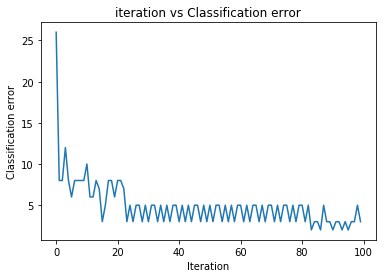

In [69]:
plt.title("iteration vs Classification error")
plt.xlabel('Iteration')
plt.ylabel('Classification error')
#plt.xlim(0,10)
plt.plot(Err)

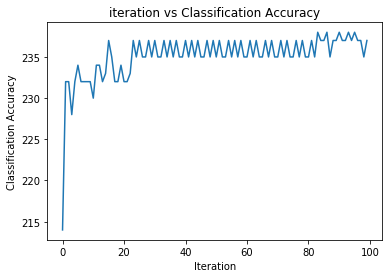

In [70]:
acc = [no_of_point-Err[i] for i in range(len(Err))]
plt.title("iteration vs Classification Accuracy")
plt.xlabel('Iteration')
plt.ylabel('Classification Accuracy')
#plt.xlim(900,1000)
plt.plot(acc)

#Testing the perceptron
**Testing the Test dataset with the Weight obtained from above training for true_positive , true_negative , false_positive and false_negative**

['true_positive', 'true_negative', 'false_positive', 'false_negative']
[115, 0, 123, 2]


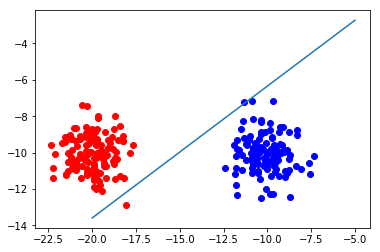

In [67]:
def testing(X,Y,y,no_of_points,W):
    true_p = 0
    true_n = 0
    false_p = 0
    false_n = 0
    acc = 0
    err=0
    for i in range(no_of_points):
        label = np.sign(y[i]*(W[0] * X[i] + W[1]* Y[i] + W[2]))
        if(label==1 and label==y[i]):
            true_p=true_p+1
            acc=acc+1
        elif(label==-1 and label==y[i]):
            true_n=true_n+1
            acc = acc+1
        elif(label==1 and label!=y[i]):
            false_p=false_p+1
            err = err+1
        elif(label==-1 and label!=y[i]):
            false_n=false_n+1
            err = err+1
    return true_p,true_n,false_p,false_n,acc,err
def csv_reader():
    rows=[]
    X=[]
    Y=[]
    y=[]
    filename = "DL/Datasets-Question1/dataset3/Test3.csv"
    with open(filename, "r") as csv_file:
        csv_reader = csv.reader(csv_file)
        for lines in csv_reader:
            X.append (float(lines[0]))
            Y.append (float(lines[1]))
            label = int(float(lines[2]))
            if(label == 0):
                y.append(-1)
            else:
                y.append(1)
    no_of_points = csv_reader.line_num
	
    return X,Y,y,no_of_points;
def main(W):
    X,Y,y,no_of_points = csv_reader()
    for i in range(no_of_points):
        if(y[i] == 1):
            plt.plot(X[i],Y[i],'bo')
        else:
            plt.plot(X[i],Y[i],'ro')
    conf_matrix = testing(X,Y,y,no_of_points,W)
    return conf_matrix,no_of_points
true_p = 0
true_n = 0
false_p = 0
false_n = 0
acc = 0
err=0
al,no_of_points = main(weight)
true_p = (al[0])
true_n = (al[1])
false_p = (al[2])
false_n = (al[3])
xx = np.linspace(-20,-5)
yy = -weight[2]-((weight[0]/weight[1])*xx)
plt.plot(xx,yy)
print(['true_positive','true_negative','false_positive','false_negative'])
print([true_p,true_n,false_p,false_n])

#Question-2

In [52]:
def perceptron(X,y,no_of_points,no_of_iter):
    W=[0,0,0,0]
    bi=1
    alpha = 0.1
    er=0
    error=[]
    for _ in range(no_of_iter):
        for i in range(no_of_points):
            #print(X[i])
            temp = y[i]*(W[0]*X[i][0] + W[1]*X[i][1] + W[2]*X[i][2] + W[3]*X[i][3] + bi)
            if(temp<=0):
                W[0]=W[0]+y[i]*X[i][0]
                W[1]=W[1]+y[i]*X[i][1]
                W[2]=W[2]+y[i]*X[i][2]
                W[3]=W[3]+y[i]*X[i][3]
                bi = bi+alpha*y[i]
                er=er+1
        error.append(er)
        er=0
    return W,bi,error
def csv_reader():
    global train
    X=[]
    y=[]
    lc=0
    filename = "DL/Dataset Question2.csv"
    with open(filename, "r") as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader: 
            if(lc<1100):
                label = int(row[4])
                if(label == 0):
                    y.append(-1)
                else:
                    y.append(1)
                row = row[:-1]

                roww = [ float(x) for x in row ]

                X.append(roww)
               #print()
            lc=lc+1
            #rint("lc ",lc)
    no_of_points = 1100
	
    return X,y,no_of_points;
def main(no_of_iter):
    X,y,no_of_points = csv_reader()
    W,bi,err = perceptron(X,y,no_of_points,no_of_iter)
    return W,bi,err,no_of_points
weight,bi,Err,no = main(500)
print(no)
print("Weights = ",weight)


1100
Weights =  [-145.85926599998132, -77.769128999993, -95.39002800000068, -23.49054580000009]


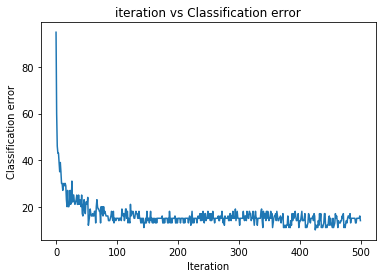

In [53]:
plt.title("iteration vs Classification error")
plt.xlabel('Iteration')
plt.ylabel('Classification error')
#plt.xlim(0,10)
plt.plot(Err)

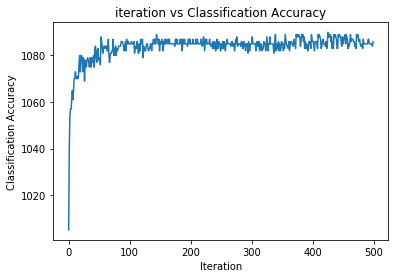

In [54]:
acc = [no_of_point-Err[i] for i in range(len(Err))]
plt.title("iteration vs Classification Accuracy")
plt.xlabel('Iteration')
plt.ylabel('Classification Accuracy')
#plt.xlim(900,1000)
plt.plot(acc)

##Testing

In [55]:
def testing(X,y,no_of_points,W):
    true_p = 0
    true_n = 0
    false_p = 0
    false_n = 0
    acc = 0
    err=0
    for i in range(no_of_points):
        label = np.sign(y[i]*(W[0]*X[i][0] + W[1]*X[i][1] + W[2]*X[i][2] + W[3]*X[i][3] + bi))
        if(label==1 and label==y[i]):
            true_p=true_p+1
            acc=acc+1
        elif(label==-1 and label==y[i]):
            true_n=true_n+1
            acc = acc+1
        elif(label==1 and label!=y[i]):
            false_p=false_p+1
            err = err+1
        elif(label==-1 and label!=y[i]):
            false_n=false_n+1
            err = err+1
    return true_p,true_n,false_p,false_n,acc,err
def csv_reader():
    global train
    X=[]
    y=[]
    lc=0
    filename = "DL/Dataset Question2.csv"
    with open(filename, "r") as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader: 
            if(lc>=1100):
                label = int(row[4])
                if(label == 0):
                    y.append(-1)
                else:
                    y.append(1)
                row = row[:-1]

                roww = [ float(x) for x in row ]

                X.append(roww)
               #print()
            lc=lc+1
            #rint("lc ",lc)
    no_of_points = 1372 - 1100
	
    return X,y,no_of_points;
	
    return X,y,no_of_points;
def main(W):
    X,y,no_of_points = csv_reader()
    conf_matrix = testing(X,y,no_of_points,W)
    return conf_matrix,no_of_points
true_p = 0
true_n = 0
false_p = 0
false_n = 0
acc = 0
err=0
al,no_of_points = main(weight)
true_p = (al[0])
true_n = (al[1])
false_p = (al[2])
false_n = (al[3])
print(['true_positive','true_negative','false_positive','false_negative'])
print([true_p,true_n,false_p,false_n])
print(no_of_points)

['true_positive', 'true_negative', 'false_positive', 'false_negative']
[114, 6, 152, 0]
272
